<a href="https://colab.research.google.com/github/bharper71/2025-school-projects/blob/main/trashpics_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path to dataset
DATA_DIR = "/content/drive/MyDrive/capstone_2/realwaste"

# Image & training parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

TRAIN_SPLIT = 0.7
VAL_SPLIT = 0.2
TEST_SPLIT = 0.1

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=1 - TRAIN_SPLIT,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

temp_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=1 - TRAIN_SPLIT,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 4769 files belonging to 9 classes.
Using 3339 files for training.
Found 4769 files belonging to 9 classes.
Using 1430 files for validation.


In [ ]:
class_names = train_ds.class_names
NUM_CLASSES = len(class_names)

print("Class names:", class_names)
print("Number of classes:", NUM_CLASSES)

# Performance optimizations
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)
test_ds = test_ds.cache().prefetch(AUTOTUNE)

Class names: ['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash', 'Paper', 'Plastic', 'Textile Trash', 'Vegetation']
Number of classes: 9


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory( DATA_DIR, validation_split=1 - TRAIN_SPLIT, subset="training", seed=SEED, image_size=IMG_SIZE, batch_size=BATCH_SIZE )

temp_ds = tf.keras.utils.image_dataset_from_directory( DATA_DIR, validation_split=1 - TRAIN_SPLIT, subset="validation", seed=SEED, image_size=IMG_SIZE, batch_size=BATCH_SIZE )

Found 4769 files belonging to 9 classes.
Using 3339 files for training.
Found 4769 files belonging to 9 classes.
Using 1430 files for validation.


In [ ]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),

    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation="softmax")
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,246,985 (84.87 MB)

 Trainable params: 22,246,985 (84.87 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

EPOCHS = 10

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[early_stop]
)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 586s 6s/step - accuracy: 0.2069 - loss: 2.4053 - val_accuracy: 0.4271 - val_loss: 1.5705
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 421s 4s/step - accuracy: 0.3834 - loss: 1.6939 - val_accuracy: 0.3812 - val_loss: 1.5467
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 417s 4s/step - accuracy: 0.4453 - loss: 1.5545 - val_accuracy: 0.5510 - val_loss: 1.2523
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 444s 4s/step - accuracy: 0.5517 - loss: 1.3009 - val_accuracy: 0.5333 - val_loss: 1.2932
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 412s 4s/step - accuracy: 0.6036 - loss: 1.1157 - val_accuracy: 0.5979 - val_loss: 1.1330
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 416s 4s/step - accuracy: 0.6924 - loss: 0.8699 - val_accuracy: 0.6500 - val_loss: 1.0344
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 419s 4s/step - accuracy: 0.7361 - loss: 0.7488 - val_accuracy: 0.6469 - val_loss: 1.0846
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 410s 4s/step - accuracy: 0.7829 - loss: 0.6006 - val_accu

In [16]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.3f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.6812 - loss: 0.9698
Test accuracy: 0.672


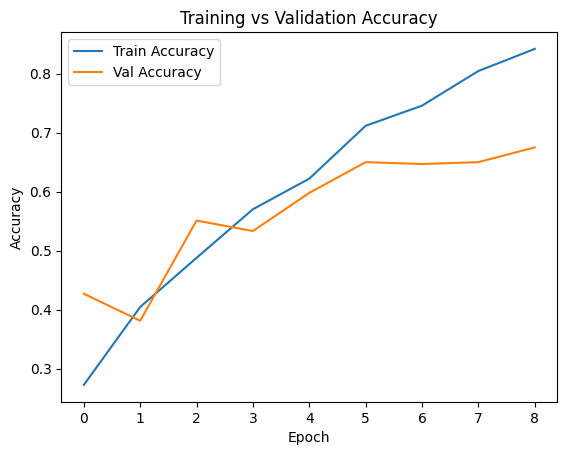

In [17]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()